In [13]:
import rebound 
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [15]:
#extraemos los datos para las posiciones de la simulación considerado solo Júpiter (500 años)
xjup = np.load('posxsolojup500anos.npy')
yjup = np.load('posysolojup500anos.npy')

#extraemos los datos para las posiciones de la simulación considerado Marte, Júpiter y Saturno (500 años)
xall = np.load('posxmarjupsat500anos.npy')
yall = np.load('posymarjupsat500anos.npy')

In [16]:
#estraemos los datos para las posiciones de la simulación considerado solo Júpiter (1000 años)
xjup1 = np.load('posxsolojup1000anos.npy')
yjup1 = np.load('posysolojup1000anos.npy')

#estraemos los datos para las posiciones de la simulación considerado Marte, Júpiter y Saturno (1000 años)
xall1 = np.load('posxmarjupsat1000anos.npy')
yall1 = np.load('posymarjupsat1000anos.npy')

In [17]:
N = 502 #número de partículas totales para las simulaciones donde solo se considera Júpiter

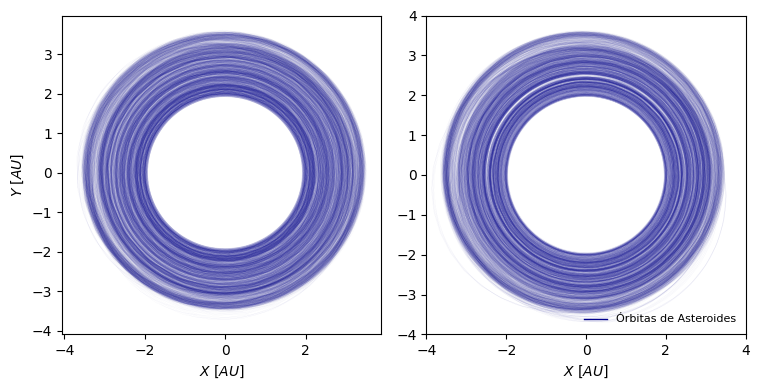

In [18]:
fig = plt.figure(figsize = (7.7,4))
ax, ax1 = fig.subplots(1,2)

#graficamos las trayectorias de las partículas contenidas en el dísco para los ultimos 40 años (sim de 500 años)
for i in range(2,N):
    ax.plot(xjup[i,1840:], yjup[i,1840:], linewidth = .1, alpha = .08, color = 'darkblue', label = 'Órbitas de Asteroides' if i == 5 else None)

ax.set_xlabel(r'$X$ $[AU]$')
ax.set_ylabel(r'$Y$ [$AU$]')

#graficamos las trayectorias de las partículas contenidas en el dísco para los ultimos 40 años (sim de 1000 años)
for i in range(2,N):
    ax1.plot(xjup1[i,4800:], yjup1[i,4800:], linewidth = .1, alpha = .08, color = 'darkblue', label = 'Órbitas de Asteroides' if i == 5 else None)

ax1.set_xlabel(r'$X$ $[AU]$')

legend = plt.legend(fontsize = 8, framealpha = 0, loc = 'lower right',)
for line in legend.get_lines():
    line.set_linewidth(1.0)
    line.set_alpha(1.0)   

plt.xlim(-4,4)
plt.ylim(-4,4)
plt.tight_layout()
plt.show()


In [19]:
N = 504 #número de partículas totales para las simulaciones donde se considera Marte, Júpiter y Saturno

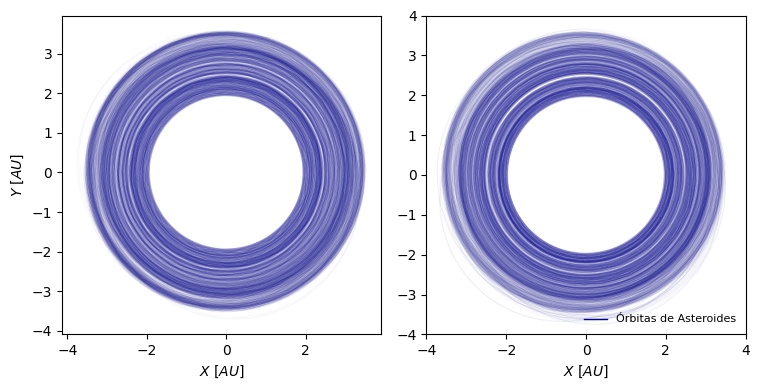

In [20]:
fig = plt.figure(figsize = (7.7,4))
ax, ax1 = fig.subplots(1,2)

#graficamos las trayectorias de las partículas contenidas en el dísco para los ultimos 40 años (sim de 500 años)
for i in range(4,N):
    ax.plot(xall[i,1840:], yall[i,1840:], linewidth = .1, alpha = .08, color = 'darkblue', label = 'Órbitas de Asteroides' if i == 5 else None)

ax.set_xlabel(r'$X$ $[AU]$')
ax.set_ylabel(r'$Y$ [$AU$]')

#graficamos las trayectorias de las partículas contenidas en el dísco para los ultimos 40 años (sim de 1000 años)
for i in range(4,N):
    ax1.plot(xall1[i,4800:], yall1[i,4800:], linewidth = .1, alpha = .08, color = 'darkblue', label = 'Órbitas de Asteroides' if i == 5 else None)

ax1.set_xlabel(r'$X$ $[AU]$')

legend = plt.legend(fontsize = 8, framealpha = 0, loc = 'lower right',)
for line in legend.get_lines():
    line.set_linewidth(1.0)
    line.set_alpha(1.0)   

plt.xlim(-4,4)
plt.ylim(-4,4)
plt.tight_layout()
plt.show()

In [21]:
#para realizar el histograma, calculamos los radios de las partículas (solo Júpiter)

radio = np.sqrt(xjup[2:,1999]**2 + yjup[2:,1999]**2) #radios estado final (500 años)
radio_in = np.sqrt(xjup[2:,0]**2 + yjup[2:,0]**2) #radios estado inicial (500 años)

radio1 = np.sqrt(xjup1[2:,1999]**2 + yjup1[2:,1999]**2) #radios estado final (1000 años)
radio_in1 = np.sqrt(xjup1[2:,0]**2 + yjup1[2:,0]**2) #radios estado inicial (1000 años)

In [22]:
#para estimar los gaps, determinamos el numero de partículas por bin de radio, usando en total 100 bins

hist, bins = np.histogram(radio, bins = 100)
gaps = np.where((hist <= 2) & (bins[1:] < 3.3))[0] #condicion para gaps (500 años y solo Júpiter)

hist1, bins1 = np.histogram(radio1, bins = 100)
gaps1 = np.where((hist1 <= 2) & (bins[1:] < 3.3) & (bins[1:] > 2.01))[0] #condicion para gaps (1000 años y solo Júpiter)

#filtración de gaps continuos de forma manual
gaps = np.delete(gaps, (6, 7), axis = None)

gaps1 = np.delete(gaps1, (3, 4), axis = None)

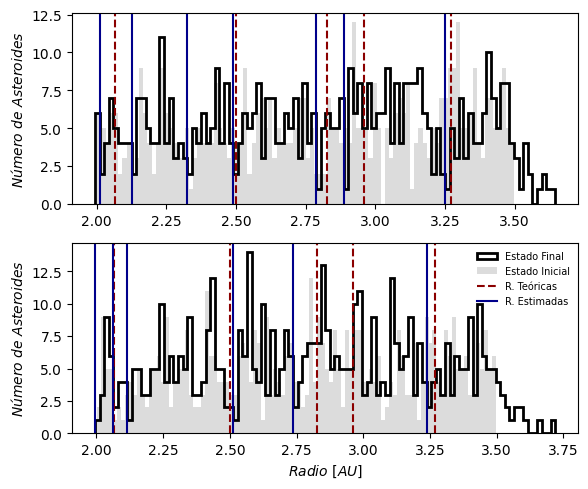

In [23]:
fig = plt.figure(figsize = (6,5))
ax, ax1 = fig.subplots(2,1)

#histograma para 500 años, solo Júpiter
ax.hist(radio, bins = 100, histtype='step', linewidth=2, color = 'black', label = 'Estado Final')
ax.hist(radio_in, bins = 100, alpha = .4, color = 'darkgrey', label = 'Estado Inicial')
ax.axvline(2.065, color = 'darkred', linestyle = '--', label = 'Resonancias Teóricas')
ax.axvline(2.5, color = 'darkred', linestyle = '--')
ax.axvline(2.825, color = 'darkred', linestyle = '--')
ax.axvline(2.96, color = 'darkred', linestyle = '--')
ax.axvline(3.27, color = 'darkred', linestyle = '--')
for i in range(0, len(bins[gaps])):
    ax.axvline(bins[gaps][i], color = 'darkblue', linestyle = '-', label = 'Resonancias Estimadas' if i == 0 else None)
ax.set_ylabel(r'$Número$ $de$ $Asteroides$')

#histograma para 1000 años, solo Júpiter
ax1.hist(radio1, bins = 100, histtype='step', linewidth=2, color = 'black', label = 'Estado Final')
ax1.hist(radio_in1, bins = 100, alpha = .4, color = 'darkgrey', label = 'Estado Inicial')
ax1.axvline(2.065, color = 'darkred', linestyle = '--', label = 'R. Teóricas')
ax1.axvline(2.5, color = 'darkred', linestyle = '--')
ax1.axvline(2.825, color = 'darkred', linestyle = '--')
ax1.axvline(2.96, color = 'darkred', linestyle = '--')
ax1.axvline(3.27, color = 'darkred', linestyle = '--')
for i in range(0, len(bins1[gaps1])):
    ax1.axvline(bins1[gaps1][i], color = 'darkblue', linestyle = '-', label = 'R. Estimadas' if i == 1 else None)
ax1.set_ylabel(r'$Número$ $de$ $Asteroides$')
ax1.set_xlabel(r'$Radio$ $[AU]$')
ax1.legend(framealpha = 0, fontsize = 7, loc = 'upper right')

plt.tight_layout()
plt.show()

In [24]:
#para realizar el histograma, calculamos los radios de las partículas (Marte, Júpiter y Saturno)

radio = np.sqrt(xall[4:,1999]**2 + yall[4:,1999]**2) #radios estado final (500 años)
radio_in = np.sqrt(xall[4:,0]**2 + yall[4:,0]**2) #radios estado inicial (500 años)

radio1 = np.sqrt(xall1[4:,1999]**2 + yall1[4:,1999]**2) #radios estado final (1000 años)
radio_in1 = np.sqrt(xall1[4:,0]**2 + yall1[4:,0]**2) #radios estado inicial (1000 años)

In [25]:
#para estimar los gaps, determinamos el numero de partículas por bin de radio, usando en total 100 bins

hist, bins = np.histogram(radio, bins = 100)
gaps = np.where((hist <= 1) & (bins[1:] < 3.3))[0] #condicion para gaps (500 años y 3 Planetas)

hist1, bins1 = np.histogram(radio1, bins = 100)
gaps1 = np.where((hist1 <= 1) & (bins[1:] < 3.3) & (bins[1:] > 2.02))[0] #condicion para gaps (1000 años y 3 Planetas)

#filtración de gaps continuos de forma manual
gaps1 = np.delete(gaps1, 2, axis = None)

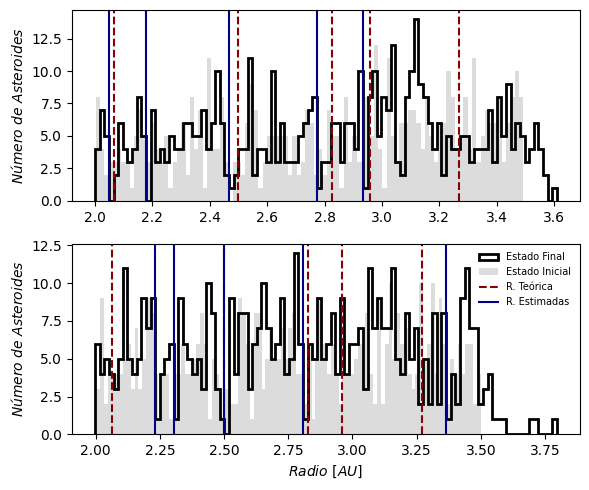

In [26]:
fig = plt.figure(figsize = (6,5))
ax, ax1 = fig.subplots(2,1)

#histograma para 500 años, 3 planetas
ax.hist(radio, bins = 100, histtype='step', linewidth=2, color = 'black', label = 'Estado Final')
ax.hist(radio_in, bins = 100, alpha = .4, color = 'darkgrey', label = 'Estado Inicial')
ax.axvline(2.065, color = 'darkred', linestyle = '--', label = 'Resonancias')
ax.axvline(2.5, color = 'darkred', linestyle = '--')
ax.axvline(2.825, color = 'darkred', linestyle = '--')
ax.axvline(2.96, color = 'darkred', linestyle = '--')
ax.axvline(3.27, color = 'darkred', linestyle = '--')
for i in range(0, len(bins[gaps])):
    ax.axvline(bins[gaps][i], color = 'darkblue', linestyle = '-', label = 'Resonancias Estimadas' if i == 0 else None)
ax.set_ylabel(r'$Número$ $de$ $Asteroides$')

#histograma para 1000 años, 3 planetas
ax1.hist(radio1, bins = 100, histtype='step', linewidth=2, color = 'black', label = 'Estado Final')
ax1.hist(radio_in1, bins = 100, alpha = .4, color = 'darkgrey', label = 'Estado Inicial')
ax1.axvline(2.065, color = 'darkred', linestyle = '--', label = 'R. Teórica')
ax1.axvline(2.5, color = 'darkred', linestyle = '--')
ax1.axvline(2.825, color = 'darkred', linestyle = '--')
ax1.axvline(2.96, color = 'darkred', linestyle = '--')
ax1.axvline(3.27, color = 'darkred', linestyle = '--')
for i in range(0, len(bins1[gaps1])):
    ax1.axvline(bins1[gaps1][i], color = 'darkblue', linestyle = '-', label = 'R. Estimadas' if i == 1 else None)
ax1.set_ylabel(r'$Número$ $de$ $Asteroides$')
ax1.set_xlabel(r'$Radio$ $[AU]$')
ax1.legend(framealpha = 0, fontsize = 7, loc = 'upper right')

plt.tight_layout()
plt.show()